In [1]:
import os

import glob
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
DATA_DIR = "/home/joseph/Images/People"

In [3]:
# list files
filenames = glob.glob(DATA_DIR+"/*/*.*")
len(filenames)

736

In [4]:
os.system(f"rm -r {DATA_DIR}/*/*.gif")
os.system(f"rm -r {DATA_DIR}/*/*.webp")

256

In [5]:
def extract_filename(path):
    return ".".join(path.split("/")[-1].split(".")[:-1])

def extract_class(path):
    return path.split("/")[-2]

def extract_extension(path):
    return path.split(".")[-1]

def extract_image_meta(path):
    try:
        image = Image.open(path)
        width, height = image.size
        mode = image.mode
    except:
        width, height, mode = None, None, None
    
    return width, height, mode

In [6]:
files = []
classes = []
extensions = []
widths = []
heights = []
modes = []
for f in filenames:
    files.append(extract_filename(f))
    classes.append(extract_class(f))
    extensions.append(extract_extension(f))
    width, height, mode = extract_image_meta(f)
    widths.append(width)
    heights.append(height)
    modes.append(mode)

/home/joseph/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [7]:
dataframe = pd.DataFrame(
    {
        "ID": range(1, len(filenames)+1),
        "FILENAME": files,
        "CLASS": classes,
        "WIDTH": widths,
        "HEIGHT": heights,
        "MODE": modes,
        "EXTENSION": extensions,
        "PATH": filenames
    })
dataframe.head()

,ID,FILENAME,CLASS,WIDTH,HEIGHT,MODE,EXTENSION,PATH
0,1,38.booba-disque-diamant,booba,1000,600,RGBA,png,/home/joseph/Images/People/booba/38.booba-disq...
1,2,8.benintimes-france-mort-de-jacques-chirac-boo...,booba,1189,669,RGB,jpg,/home/joseph/Images/People/booba/8.benintimes-...
2,3,5.801x410_d01v6q8xgaa7lqq,booba,801,410,RGB,jpg,/home/joseph/Images/People/booba/5.801x410_d01...
3,4,54.12549_1533216436_booba-kaaris-crop_970x606p,booba,970,606,RGB,jpg,/home/joseph/Images/People/booba/54.12549_1533...
4,5,16.Booba-menace-la-fille-de-Kaaris-sur-Instagr...,booba,1000,450,RGB,jpg,/home/joseph/Images/People/booba/16.Booba-mena...


In [8]:
dataframe.to_csv("images-metadata.csv", index=False)

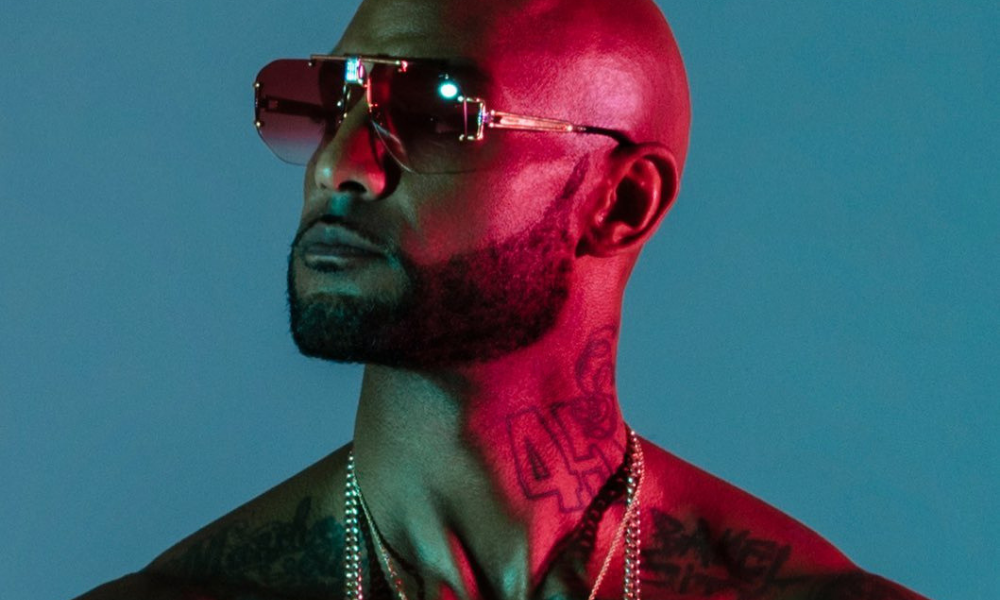

In [9]:
image = Image.open(filenames[0])
image